In [2]:
import pandas as pd

### Read the file ex2.csv

In [3]:
data = pd.read_csv(r"D:\Malathi\EDA\data.csv")

### Fill the missing values in the data using the appropriate methods

In [161]:
data = data.drop('Market Category',axis = 1)

In [72]:
data = data.dropna(subset = ['Engine Fuel Type','Number of Doors'])

In [74]:
grp = data.groupby(['Make','Model'])

In [75]:
grp.first()

Year                Engine Fuel Type  Engine HP  \
Make  Model                                                         
Acura CL          2001     premium unleaded (required)      225.0   
      ILX         2015  premium unleaded (recommended)      201.0   
      ILX Hybrid  2014  premium unleaded (recommended)      111.0   
      Integra     1999                regular unleaded      140.0   
      Legend      1993                regular unleaded      200.0   
...                ...                             ...        ...   
Volvo V90         1998                regular unleaded      181.0   
      XC          2002     premium unleaded (required)      197.0   
      XC60        2015                regular unleaded      325.0   
      XC70        2014                regular unleaded      240.0   
      XC90        2014                regular unleaded      240.0   

                  Engine Cylinders Transmission Type      Driven_Wheels  \
Make  Model                                                               
Acura CL                       6.0         AUTOMATIC  front wheel drive   
      ILX                      4.0            MANUAL  front wheel drive   
      ILX Hybrid               4.0         AUTOMATIC  front wheel drive   
      Integra                  4.0            MANUAL  front wheel drive   
      Legend                   6.0            MANUAL  front wheel drive   
...                            ...               ...                ...   
Volvo V90                      6.0         AUTOMATIC   rear wheel drive   
      XC                       5.0         AUTOMATIC    all wheel drive   
      XC60                     6.0         AUTOMATIC    all wheel drive   
      XC70                     6.0         AUTOMATIC  front wheel drive   
      XC90                     6.0         AUTOMATIC  front wheel drive   

                  Number of Doors Vehicle Size Vehicle Style  highway MPG  \
Make  Model                                                                 
Acura CL                      2.0      Midsize         Coupe           27   
      ILX                     4.0      Compact         Sedan           31   
      ILX Hybrid              4.0      Compact         Sedan           38   
      Integra                 4.0      Compact         Sedan           29   
      Legend                  4.0      Midsize         Sedan           23   
...                           ...          ...           ...          ...   
Volvo V90                     4.0      Midsize         Wagon           23   
      XC                      4.0      Midsize         Wagon           23   
      XC60                    4.0      Midsize       4dr SUV           24   
      XC70                    4.0      Midsize         Wagon           26   
      XC90                    4.0      Midsize       4dr SUV           25   

                  city mpg  Popularity   MSRP  
Make  Model                                    
Acura CL                17         204  29980  
      ILX               22         204  29350  
      ILX Hybrid        39         204  28900  
      Integra           22         204   2827  
      Legend            15         204   2000  
...                    ...         ...    ...  
Volvo V90               16         870   2200  
      XC                17         870  36500  
      XC60              17         870  51050  
      XC70              18         870  34500  
      XC90              16         870  39700  

[928 rows x 13 columns]

In [76]:
grp['Engine HP'].mean()

Make   Model     
Acura  CL            236.666667
       ILX           194.200000
       ILX Hybrid    111.000000
       Integra       151.304348
       Legend        215.000000
                        ...    
Volvo  V90           181.000000
       XC            197.000000
       XC60          279.711538
       XC70          252.941176
       XC90          277.625000
Name: Engine HP, Length: 928, dtype: float64

In [77]:
grp['Engine HP'].transform(lambda x : x.fillna(x.mean()))

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: Engine HP, Length: 11905, dtype: float64

In [78]:
grp['Engine Cylinders'].transform(lambda x : x.fillna(x.mean()))

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
11909    6.0
11910    6.0
11911    6.0
11912    6.0
11913    6.0
Name: Engine Cylinders, Length: 11905, dtype: float64

### Check for outliers in the numeric data. Remove all the outliers present.Create suitable charts.

In [79]:
import matplotlib.pyplot as plt

<AxesSubplot:>

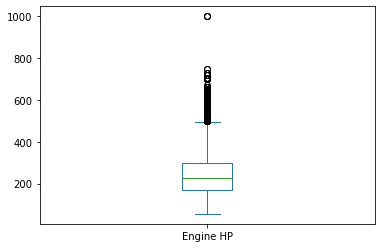

In [80]:
data['Engine HP'].plot(kind='box')

In [81]:
def remove(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    Iqr = q3 - q1
    upper = q3 +1.5*Iqr
    lower = q1 - 1.5*Iqr
    
    data_fin = data[(data[col]>lower) & (data[col]<upper)]
    return data_fin

In [82]:
data = remove(data,'Engine HP')

In [83]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


<AxesSubplot:>

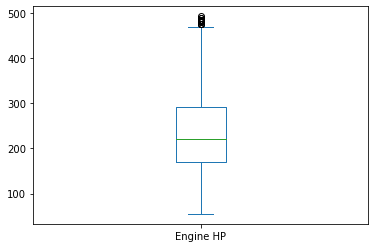

In [84]:
data['Engine HP'].plot(kind='box')

<AxesSubplot:>

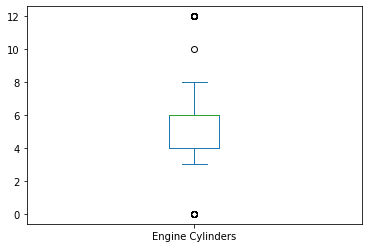

In [85]:
data['Engine Cylinders'].plot(kind='box')

In [86]:
data = remove(data,'Engine Cylinders')

<AxesSubplot:>

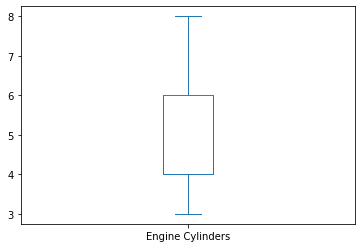

In [87]:
data['Engine Cylinders'].plot(kind='box')

<AxesSubplot:>

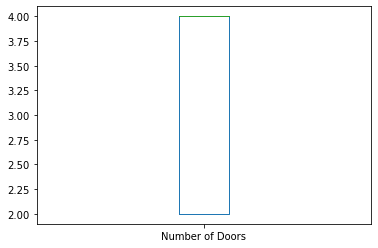

In [88]:
data['Number of Doors'].plot(kind='box')

<AxesSubplot:>

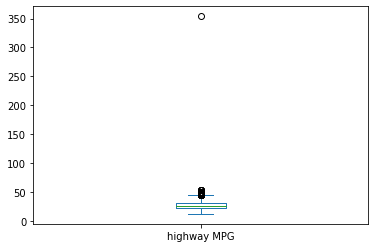

In [89]:
data['highway MPG'].plot(kind='box')

In [90]:
data = remove(data,'highway MPG')

<AxesSubplot:>

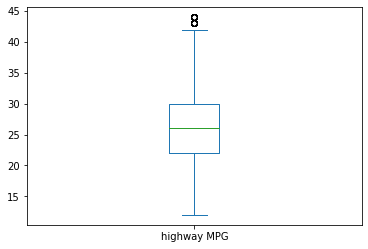

In [91]:
data['highway MPG'].plot(kind='box')

<AxesSubplot:>

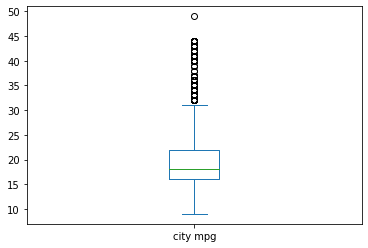

In [92]:
data['city mpg'].plot(kind='box')

In [93]:
data = remove(data,'city mpg')

<AxesSubplot:>

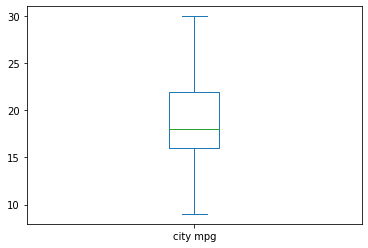

In [94]:
data['city mpg'].plot(kind='box')

<AxesSubplot:>

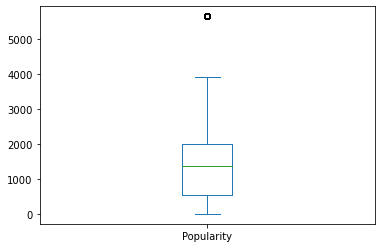

In [95]:
data['Popularity'].plot(kind='box')

<AxesSubplot:>

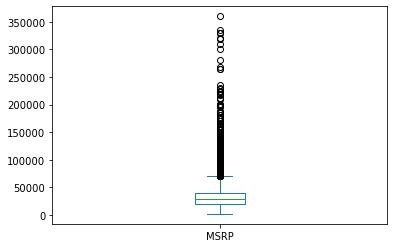

In [96]:
data['MSRP'].plot(kind='box')

In [97]:
data = remove(data,'MSRP')

<AxesSubplot:>

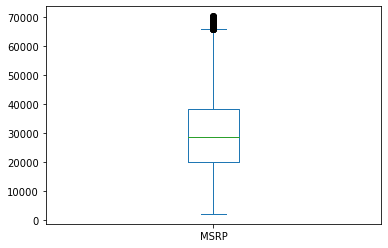

In [98]:
data['MSRP'].plot(kind = 'box')

In [101]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


### List down the number of unique values in each categorical column present in the data

In [108]:
l = ['Engine Fuel Type','Make','Model','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']
for i in l:
    print("for",i,":",len(pd.unique(data[i])))
    print("\n")

for Engine Fuel Type : 8


for Make : 38


for Model : 737


for Transmission Type : 4


for Driven_Wheels : 4


for Vehicle Size : 3


for Vehicle Style : 16




### Find the average engine HP for rear wheel drive with manual transmission type.

In [110]:
grp1 = data.groupby(['Transmission Type','Driven_Wheels'])

In [131]:
print(grp1['Engine HP'].mean())

Transmission Type  Driven_Wheels    
AUTOMATED_MANUAL   all wheel drive      267.255814
                   front wheel drive    194.633858
                   rear wheel drive     246.461538
AUTOMATIC          all wheel drive      254.231200
                   four wheel drive     290.877114
                   front wheel drive    202.344814
                   rear wheel drive     276.909456
MANUAL             all wheel drive      234.866197
                   four wheel drive     183.583851
                   front wheel drive    152.966667
                   rear wheel drive     236.362914
UNKNOWN            four wheel drive     190.000000
                   front wheel drive    125.000000
                   rear wheel drive     185.909091
Name: Engine HP, dtype: float64


In [133]:
grp2 = grp1.get_group(("MANUAL","rear wheel drive"))

In [134]:
grp2['Engine HP'].mean()

236.36291390728476

### Find the min, max, average of city mpg for different Car make and vehicle style.

In [136]:
grp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Acura,ZDX,2011,premium unleaded (required),300.0,NaN,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670


In [152]:
g = grp['city mpg'].describe()

In [153]:
print(g)

                  count       mean       std   min    25%   50%   75%   max
Make  Model                                                                
Acura CL            9.0  17.000000  0.000000  17.0  17.00  17.0  17.0  17.0
      ILX          16.0  24.625000  0.806226  22.0  24.75  25.0  25.0  25.0
      ILX Hybrid    2.0  39.000000  0.000000  39.0  39.00  39.0  39.0  39.0
      Integra      24.0  21.833333  0.380693  21.0  22.00  22.0  22.0  22.0
      Legend       16.0  16.000000  0.632456  15.0  16.00  16.0  16.0  17.0
...                 ...        ...       ...   ...    ...   ...   ...   ...
Volvo V90           1.0  16.000000       NaN  16.0  16.00  16.0  16.0  16.0
      XC            1.0  17.000000       NaN  17.0  17.00  17.0  17.0  17.0
      XC60         54.0  19.925926  2.633971  17.0  17.00  20.0  22.0  24.0
      XC70         18.0  20.166667  2.662374  17.0  18.00  19.0  23.0  24.0
      XC90         17.0  20.470588  1.940285  16.0  20.00  20.0  22.0  22.0

[928 rows x

In [156]:
g.drop(['25%','50%','75%','std','count'],axis=1)

mean   min   max
Make  Model                            
Acura CL          17.000000  17.0  17.0
      ILX         24.625000  22.0  25.0
      ILX Hybrid  39.000000  39.0  39.0
      Integra     21.833333  21.0  22.0
      Legend      16.000000  15.0  17.0
...                     ...   ...   ...
Volvo V90         16.000000  16.0  16.0
      XC          17.000000  17.0  17.0
      XC60        19.925926  17.0  24.0
      XC70        20.166667  17.0  24.0
      XC90        20.470588  16.0  22.0

[928 rows x 3 columns]